In [1]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv("/content/IPL_Matches_2008_2022.csv")
balls_df = pd.read_csv("/content/IPL_Ball_by_Ball_2008_2022.csv")

# Filter for first innings only
first_innings_df = balls_df[balls_df['innings'] == 1].copy()

# Add 'over' column (integer version of overs for grouping)
first_innings_df['over'] = first_innings_df['overs'].astype(int)

# Calculate over-wise total runs for each match
overwise_runs = first_innings_df.groupby(['ID', 'over'])['total_run'].sum().reset_index()

# Pivot table to get Over_1 to Over_20 as columns
overwise_pivot = overwise_runs.pivot(index='ID', columns='over', values='total_run').fillna(0)
overwise_pivot.columns = [f'Over_{col}' for col in overwise_pivot.columns]
overwise_pivot.reset_index(inplace=True)

# Calculate total first innings runs (our target variable)
total_runs = first_innings_df.groupby('ID')['total_run'].sum().reset_index()
total_runs.rename(columns={'total_run': 'total_innings_runs'}, inplace=True)

# Merge total runs with overwise features
features_df = pd.merge(total_runs, overwise_pivot, on='ID', how='left')

# Select match-level metadata to merge
match_meta = matches_df[['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Venue',
                         'Team1', 'Team2', 'TossWinner', 'TossDecision']]

# Merge match metadata
final_df = pd.merge(features_df, match_meta, on='ID', how='left')

# Final dataset ready
print("Final dataset shape:", final_df.shape)
final_df.head()

Final dataset shape: (146, 31)


,ID,total_innings_runs,Over_0,Over_1,Over_2,Over_3,Over_4,Over_5,Over_6,Over_7,...,Over_19,City,Date,Season,MatchNumber,Venue,Team1,Team2,TossWinner,TossDecision
0,1216540,137.0,8.0,11.0,8.0,10.0,4.0,6.0,11.0,11.0,...,0.0,NaN,2020-10-12,2020/21,28,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat
1,1216541,195.0,10.0,10.0,1.0,13.0,11.0,14.0,3.0,5.0,...,27.0,Abu Dhabi,2020-10-25,2020/21,45,Sheikh Zayed Stadium,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat
2,1216542,201.0,13.0,6.0,7.0,15.0,11.0,6.0,6.0,18.0,...,14.0,NaN,2020-10-08,2020/21,22,Dubai International Cricket Stadium,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat
3,1216543,161.0,3.0,7.0,2.0,8.0,13.0,14.0,5.0,9.0,...,8.0,NaN,2020-10-14,2020/21,30,Dubai International Cricket Stadium,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat
4,1216544,145.0,11.0,7.0,8.0,5.0,7.0,8.0,5.0,4.0,...,7.0,NaN,2020-10-25,2020/21,44,Dubai International Cricket Stadium,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat


In [3]:
import pandas as pd

# Load datasets
matches_df = pd.read_csv("/content/IPL_Matches_2008_2022.csv")
balls_df = pd.read_csv("/content/IPL_Ball_by_Ball_2008_2022.csv")

# Filter for first innings data only
first_innings_df = balls_df[balls_df['innings'] == 1].copy()

# Create integer 'over' column
first_innings_df['over'] = first_innings_df['overs'].astype(int)

# Calculate total runs per over per match
overwise_runs = first_innings_df.groupby(['ID', 'over'])['total_run'].sum().reset_index()

# Pivot to make Over_0 to Over_19 columns
overwise_pivot = overwise_runs.pivot(index='ID', columns='over', values='total_run').fillna(0)
overwise_pivot.columns = [f'Over_{col}' for col in overwise_pivot.columns]
overwise_pivot.reset_index(inplace=True)

# Total first innings score (our prediction target)
total_runs = first_innings_df.groupby('ID')['total_run'].sum().reset_index()
total_runs.rename(columns={'total_run': 'total_innings_runs'}, inplace=True)

# Merge total runs and over-wise runs
features_df = pd.merge(total_runs, overwise_pivot, on='ID', how='left')

# Merge with selected match metadata
meta_cols = ['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Venue', 'Team1', 'Team2', 'TossWinner', 'TossDecision']
final_df = pd.merge(features_df, matches_df[meta_cols], on='ID', how='left')

# Display the full merged dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Final merged dataset (first 10 rows):")
print(final_df.head(900))

Final merged dataset (first 10 rows):
          ID  total_innings_runs  Over_0  Over_1  Over_2  Over_3  Over_4  \
0     729291               191.0     6.0     7.0     9.0    10.0     9.0   
1     729293               177.0     4.0    10.0     9.0     2.0     5.0   
2     729295               193.0     2.0     1.0    16.0     7.0    12.0   
3     729297               140.0     5.0     3.0    10.0     2.0    12.0   
4     729299               150.0     6.0    11.0     5.0     6.0    10.0   
..       ...                 ...     ...     ...     ...     ...     ...   
541  1304116               157.0     5.0     4.0     9.0     6.0     8.0   
542  1312197               188.0     9.0     2.0     7.0    10.0    14.0   
543  1312198               207.0     4.0     9.0     7.0     4.0     8.0   
544  1312199               157.0     8.0     5.0     4.0     8.0    12.0   
545  1312200               130.0     2.0     5.0    14.0    10.0     6.0   

     Over_5  Over_6  Over_7  Over_8  Over_9  Over

In [4]:
!pip install tensorflow

In [5]:
# Drop rows with missing values
final_df.dropna(inplace=True)

In [6]:
# Define features and target
numerical_features = [col for col in final_df.columns if col.startswith('Over_')]
categorical_features = ['City', 'Venue', 'Team1', 'Team2', 'TossWinner', 'TossDecision']
target = 'total_innings_runs'

X = final_df[numerical_features + categorical_features]
y = final_df[target]

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 28953.8789 - mae: 167.5579 - val_loss: 27839.8477 - val_mae: 163.7900
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 28574.1074 - mae: 166.2193 - val_loss: 27344.7656 - val_mae: 162.2776
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26713.3340 - mae: 160.8044 - val_loss: 26637.2090 - val_mae: 160.0925
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26657.3105 - mae: 160.5563 - val_loss: 25571.3340 - val_mae: 156.7768
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25778.5371 - mae: 157.7796 - val_loss: 24005.4180 - val_mae: 151.8069
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23994.8145 - mae: 151.8227 - val_loss: 21817.4531 - val_mae: 144.6136
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20716.3770 - mae: 141.3659 - val_loss: 18898.9004 - val_mae: 134.4628
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17460.5742 - mae: 129.7311 - v

In [115]:
# Evaluate model
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 149.6030 - mae: 9.5424
Test Loss: 145.32127380371094
Test MAE: 9.459266662597656


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the DNN model architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 27854.1562 - mae: 164.1533 - val_loss: 27609.3652 - val_mae: 163.0843
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27807.0547 - mae: 164.0080 - val_loss: 26112.7129 - val_mae: 158.4364
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24792.3555 - mae: 154.6162 - val_loss: 22513.6152 - val_mae: 146.7271
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20903.0410 - mae: 141.6921 - val_loss: 14864.3857 - val_mae: 118.3303
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11497.5137 - mae: 102.8247 - val_loss: 4067.3789 - val_mae: 61.6698
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2172.4619 - mae: 40.1456 - val_loss: 957.9767 - val_mae: 21.3248
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1966.8018 - mae: 35.4014 - val_loss: 480.3976 - val_mae: 14.7826
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 868.5420 - mae: 23.9654 - val_loss: 765.4676 - val_mae

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 9.46
MSE: 145.32
RMSE: 12.05
R² Score: 0.81


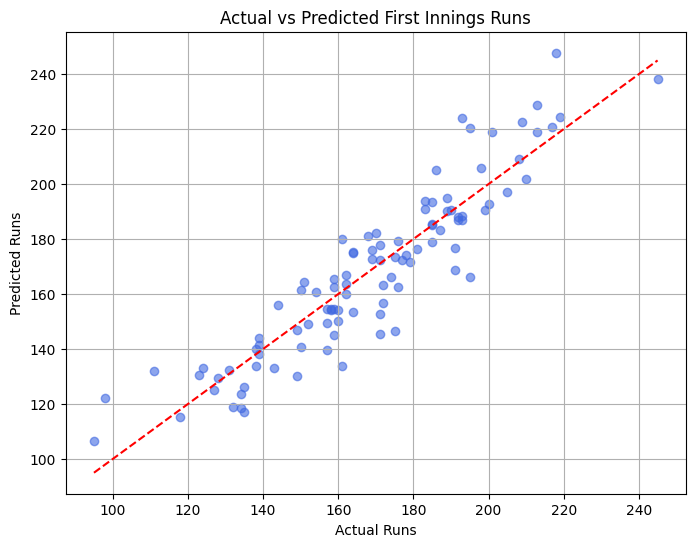

In [12]:
import matplotlib.pyplot as plt

# Flatten predictions if needed
y_pred_flat = y_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted First Innings Runs')
plt.grid(True)
plt.show()

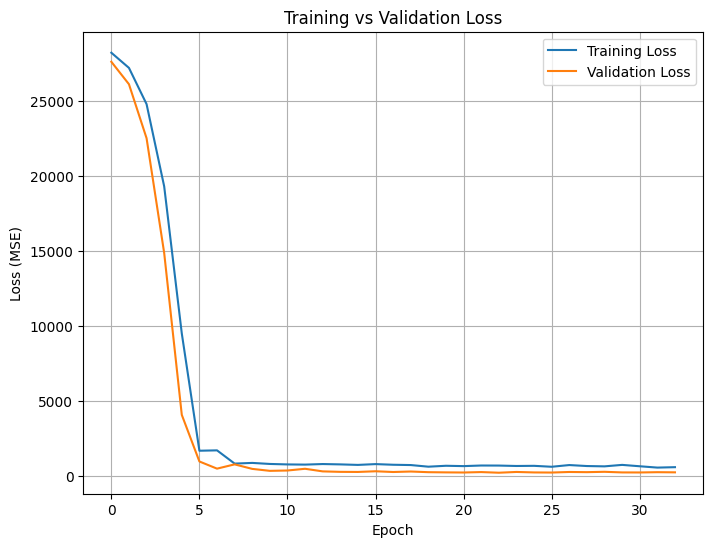

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Only use numerical (over-wise) features for CNN input
X_train_cnn = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_cnn = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(numerical_features), 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history_cnn = cnn_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 26365.4082 - mae: 159.7547 - val_loss: 21680.1211 - val_mae: 144.4992
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19601.0078 - mae: 137.2632 - val_loss: 12928.3076 - val_mae: 111.4022
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11245.8311 - mae: 102.5518 - val_loss: 4304.4111 - val_mae: 63.7293
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3334.5369 - mae: 51.5158 - val_loss: 196.6722 - val_mae: 11.6290
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 709.2914 - mae: 21.7691 - val_loss: 420.7512 - val_mae: 17.5790
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 962.5108 - mae: 23.7729 - val_loss: 136.3810 - val_mae: 9.7238
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 590.3782 - mae: 19.4051 - val_loss: 189.9975 - val_mae: 11.4499
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 639.8972 - mae: 20.6922 - val_loss: 169.1640 - val_mae: 10.7866
Epoc

In [16]:
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)

# MSE
mse_cnn = mean_squared_error(y_test, y_pred_cnn)

# RMSE
rmse_cnn = np.sqrt(mse_cnn)

# R² Score
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f"CNN MAE: {mae_cnn:.2f}")
print(f"CNN MSE: {mse_cnn:.2f}")
print(f"CNN RMSE: {rmse_cnn:.2f}")
print(f"CNN R² Score: {r2_cnn:.2f}")

CNN MAE: 8.86
CNN MSE: 110.73
CNN RMSE: 10.52
CNN R² Score: 0.86


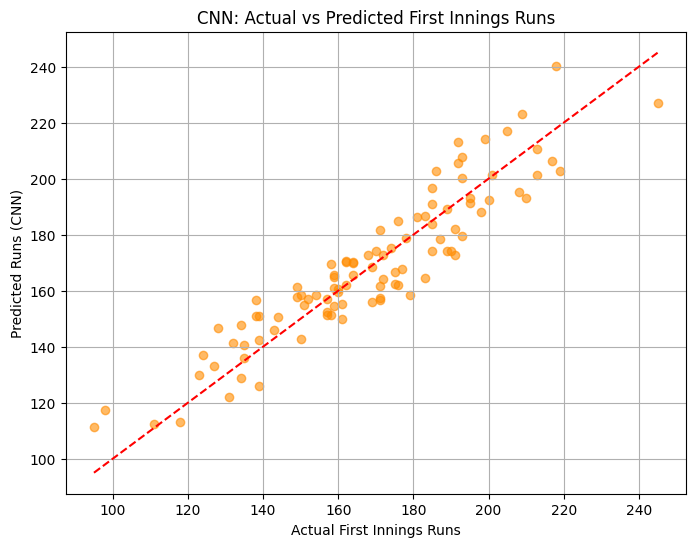

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cnn, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (CNN)")
plt.title("CNN: Actual vs Predicted First Innings Runs")
plt.grid(True)
plt.show()

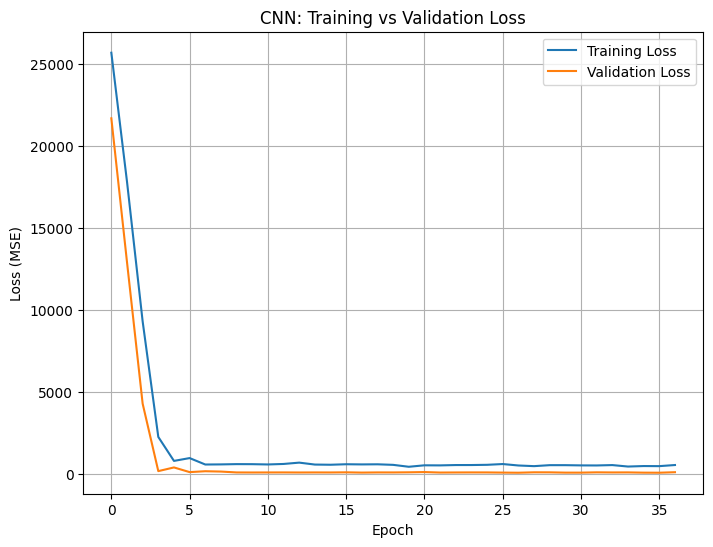

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("CNN: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Reshape numerical features into sequences (samples, timesteps, features)
X_train_rnn = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_rnn = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(len(numerical_features), 1), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_rnn = rnn_model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 28922.1562 - mae: 167.4139 - val_loss: 27215.0527 - val_mae: 161.9332
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 27223.5605 - mae: 161.8808 - val_loss: 26454.1602 - val_mae: 159.5824
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26146.8457 - mae: 158.6371 - val_loss: 25511.1523 - val_mae: 156.6084
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25442.2617 - mae: 156.7515 - val_loss: 24344.0156 - val_mae: 152.8413
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24149.6250 - mae: 152.6771 - val_loss: 22970.6523 - val_mae: 148.2652
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22757.3320 - mae: 148.0834 - val_loss: 21444.7461 - val_mae: 143.0080
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21073.2090 - mae: 142.2289 - val_loss: 19819.4258 - val_mae: 137.1895
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20040.4746 - mae: 137.8564 - val_loss: 181

In [22]:
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f"RNN MAE: {mae_rnn:.2f}")
print(f"RNN MSE: {mse_rnn:.2f}")
print(f"RNN RMSE: {rmse_rnn:.2f}")
print(f"RNN R² Score: {r2_rnn:.2f}")

RNN MAE: 16.05
RNN MSE: 408.60
RNN RMSE: 20.21
RNN R² Score: 0.47


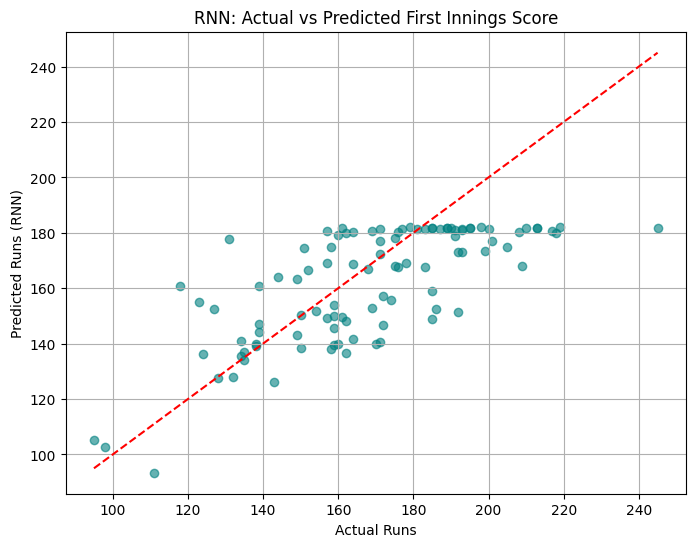

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs (RNN)")
plt.title("RNN: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()

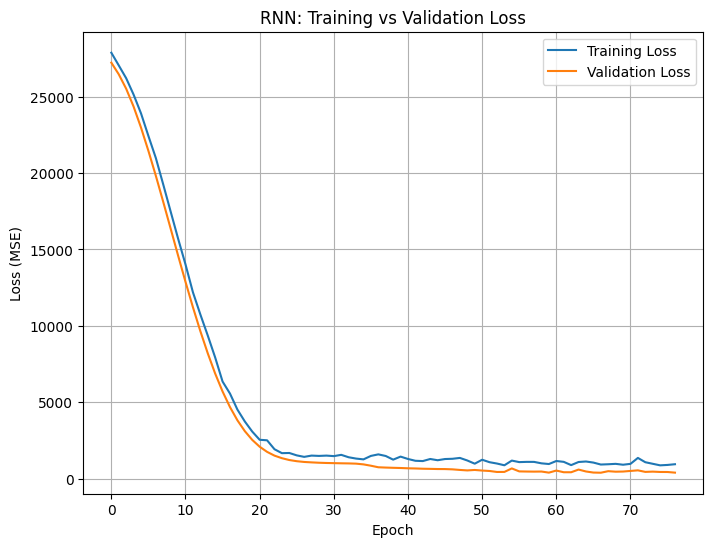

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("RNN: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Reshape input data (samples, timesteps, features)
X_train_lstm = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_lstm = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(len(numerical_features), 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Set early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 28630.6680 - mae: 166.6493 - val_loss: 27717.6309 - val_mae: 163.4468
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 28535.9043 - mae: 166.1883 - val_loss: 27118.9570 - val_mae: 161.6093
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 27322.5566 - mae: 162.7778 - val_loss: 26343.0586 - val_mae: 159.1813
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 25659.3965 - mae: 157.0275 - val_loss: 25346.3496 - val_mae: 156.0069
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 25440.5215 - mae: 156.7031 - val_loss: 24022.6816 - val_mae: 151.7044
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23918.9805 - mae: 151.6097 - val_loss: 22581.5820 - val_mae: 146.8775
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 22089.6543 - mae: 145.3729 - val_loss: 21060.1133 - val_mae: 141.6021
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20634.7070 - mae: 140.4178 - val_loss: 195

In [28]:
# Evaluate the model
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Test Loss: {test_loss_lstm:.2f}")
print(f"LSTM Test MAE: {test_mae_lstm:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 53.6696 - mae: 4.7586
LSTM Test Loss: 56.80
LSTM Test MAE: 4.84


In [29]:
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate standard regression metrics
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Print results
print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM MSE: {mse_lstm:.2f}")
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM R² Score: {r2_lstm:.2f}")

LSTM MAE: 4.84
LSTM MSE: 56.80
LSTM RMSE: 7.54
LSTM R² Score: 0.93


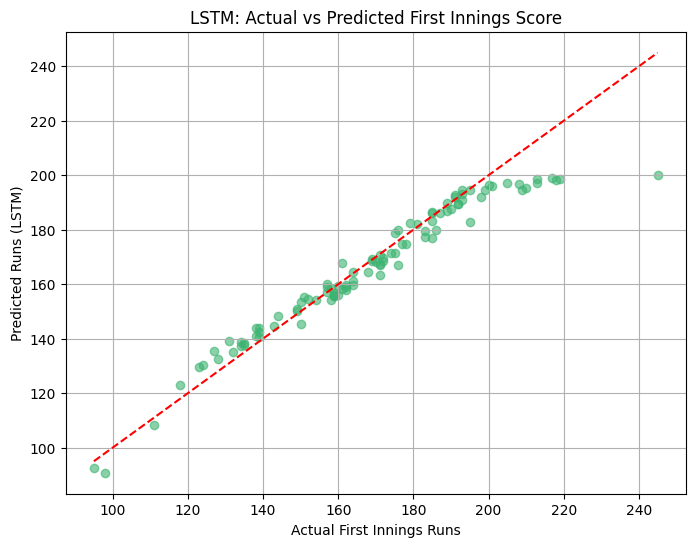

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.6, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (LSTM)")
plt.title("LSTM: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()

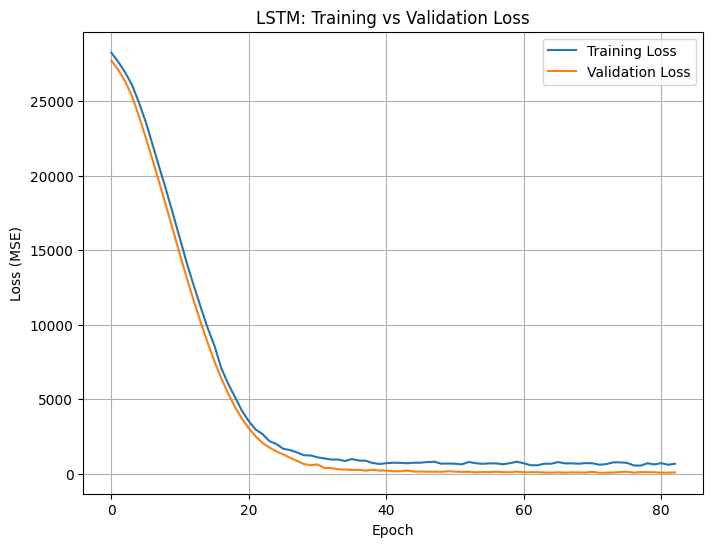

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("LSTM: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Reshape input data for BiLSTM (same as LSTM)
X_train_bilstm = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_bilstm = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(len(numerical_features), 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Regression output
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_bilstm = bilstm_model.fit(
    X_train_bilstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 28565.8301 - mae: 166.5624 - val_loss: 27561.3809 - val_mae: 162.9597
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 27508.5898 - mae: 163.1002 - val_loss: 26607.9590 - val_mae: 160.0032
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25890.5977 - mae: 158.3808 - val_loss: 25244.6836 - val_mae: 155.6801
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24745.3887 - mae: 154.1687 - val_loss: 23501.5664 - val_mae: 149.9790
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22552.6895 - mae: 147.2029 - val_loss: 21381.1836 - val_mae: 142.7337
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21183.2344 - mae: 142.0129 - val_loss: 19165.5195 - val_mae: 134.7460
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18654.9473 - mae: 133.5902 - val_loss: 16953.9219 - val_mae: 126.2682
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16401.4883 - mae: 124.2700 - val_loss: 147

In [35]:
# Evaluate the model on test data
test_loss_bilstm, test_mae_bilstm = bilstm_model.evaluate(X_test_bilstm, y_test)
print(f"BiLSTM Test Loss: {test_loss_bilstm:.2f}")
print(f"BiLSTM Test MAE: {test_mae_bilstm:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.1344 - mae: 4.4534
BiLSTM Test Loss: 47.19
BiLSTM Test MAE: 4.64


In [36]:
y_pred_bilstm = bilstm_model.predict(X_test_bilstm).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)

print(f"BiLSTM MAE: {mae_bilstm:.2f}")
print(f"BiLSTM MSE: {mse_bilstm:.2f}")
print(f"BiLSTM RMSE: {rmse_bilstm:.2f}")
print(f"BiLSTM R² Score: {r2_bilstm:.2f}")

BiLSTM MAE: 4.64
BiLSTM MSE: 47.19
BiLSTM RMSE: 6.87
BiLSTM R² Score: 0.94


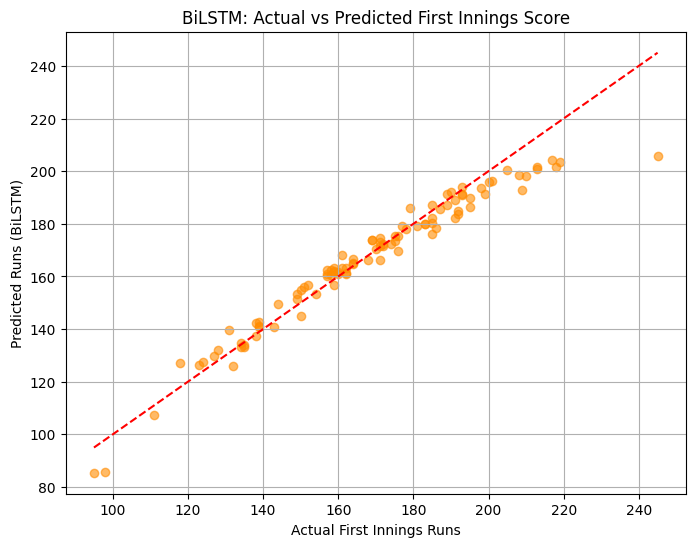

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bilstm, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (BiLSTM)")
plt.title("BiLSTM: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()

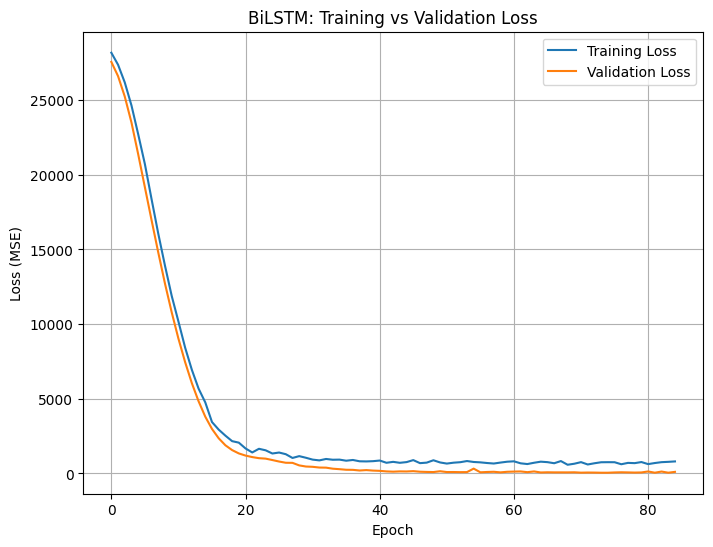

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("BiLSTM: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Reshape the input for GRU model
X_train_gru = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_gru = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define GRU model
gru_model = Sequential([
    GRU(64, return_sequences=False, input_shape=(len(numerical_features), 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_gru = gru_model.fit(
    X_train_gru, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 28971.3770 - mae: 167.2612 - val_loss: 27199.9590 - val_mae: 161.9127
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 26260.1426 - mae: 159.4892 - val_loss: 26096.0664 - val_mae: 158.5321
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 25404.1719 - mae: 156.7010 - val_loss: 24717.7148 - val_mae: 154.1341
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 24500.7012 - mae: 153.6831 - val_loss: 23131.3945 - val_mae: 148.8283
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22915.3984 - mae: 148.2654 - val_loss: 21455.6836 - val_mae: 143.0495
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20960.1348 - mae: 141.6941 - val_loss: 19728.5898 - val_mae: 136.8628
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19324.4648 - mae: 135.6689 - val_loss: 17943.6602 - val_mae: 130.1668
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17687.7188 - mae: 129.0577 - val_loss: 161

In [42]:
# Evaluate performance
test_loss_gru, test_mae_gru = gru_model.evaluate(X_test_gru, y_test)
print(f"GRU Test Loss: {test_loss_gru:.2f}")
print(f"GRU Test MAE: {test_mae_gru:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35.4433 - mae: 3.5572
GRU Test Loss: 38.02
GRU Test MAE: 3.66


In [43]:
y_pred_gru = gru_model.predict(X_test_gru).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

# Display metrics
print(f"GRU MAE: {mae_gru:.2f}")
print(f"GRU MSE: {mse_gru:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")
print(f"GRU R² Score: {r2_gru:.2f}")

GRU MAE: 3.66
GRU MSE: 38.02
GRU RMSE: 6.17
GRU R² Score: 0.95


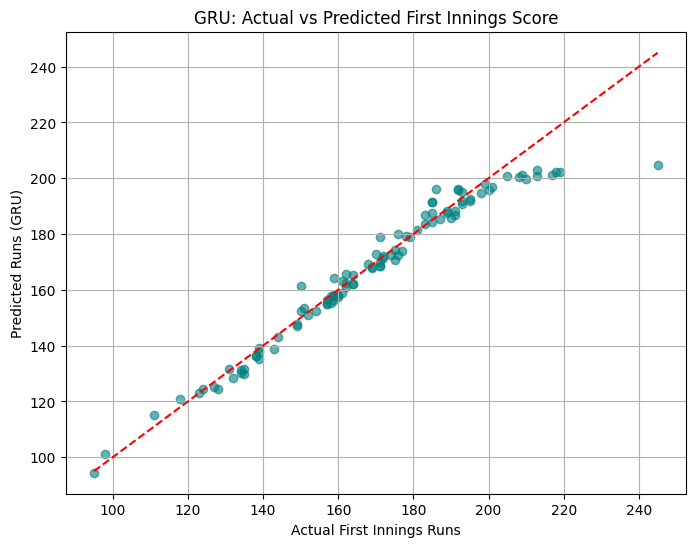

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gru, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (GRU)")
plt.title("GRU: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()

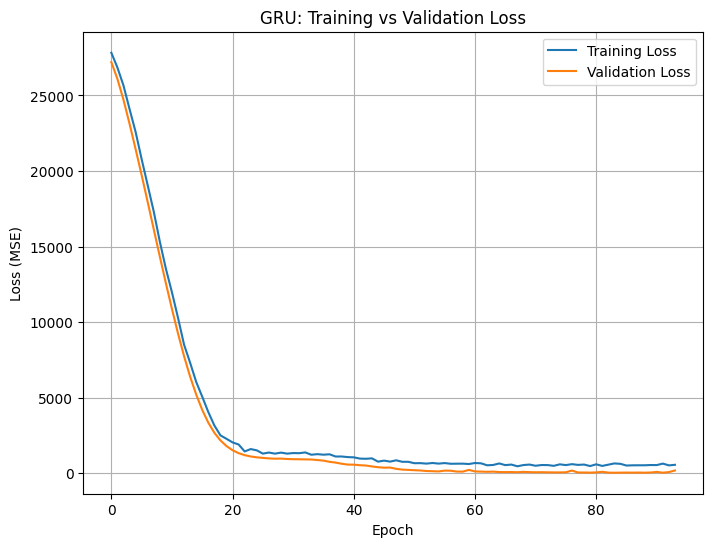

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("GRU: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Reshape input as [samples, time steps, features] — same as before
X_train_cnn_bilstm = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_cnn_bilstm = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout

# Define the model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(numerical_features), 1)),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Setup EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(
    X_train_cnn_bilstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 27621.3125 - mae: 163.4330 - val_loss: 26761.8848 - val_mae: 160.5202
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 26614.4336 - mae: 160.4302 - val_loss: 24972.6875 - val_mae: 154.8658
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 24459.2812 - mae: 153.4100 - val_loss: 22783.8398 - val_mae: 147.6340
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 22589.9395 - mae: 147.1243 - val_loss: 20407.3301 - val_mae: 139.3435
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19633.0547 - mae: 136.7029 - val_loss: 17982.8906 - val_mae: 130.3463
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17851.6074 - mae: 130.1714 - val_loss: 15573.2188 - val_mae: 120.7347
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15522.5879 - mae: 120.3807 - val_loss: 13162.1123 - val_mae: 110.3052
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13100.7207 - mae: 110.3862 - v

In [49]:
test_loss_cnn_bilstm, test_mae_cnn_bilstm = cnn_bilstm_model.evaluate(X_test_cnn_bilstm, y_test)
print(f"CNN-BiLSTM Test Loss: {test_loss_cnn_bilstm:.2f}")
print(f"CNN-BiLSTM Test MAE: {test_mae_cnn_bilstm:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 94.7194 - mae: 7.4925
CNN-BiLSTM Test Loss: 97.87
CNN-BiLSTM Test MAE: 7.55


In [50]:
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm = np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

print(f"CNN-BiLSTM MAE: {mae_cnn_bilstm:.2f}")
print(f"CNN-BiLSTM MSE: {mse_cnn_bilstm:.2f}")
print(f"CNN-BiLSTM RMSE: {rmse_cnn_bilstm:.2f}")
print(f"CNN-BiLSTM R² Score: {r2_cnn_bilstm:.2f}")

CNN-BiLSTM MAE: 7.55
CNN-BiLSTM MSE: 97.87
CNN-BiLSTM RMSE: 9.89
CNN-BiLSTM R² Score: 0.87


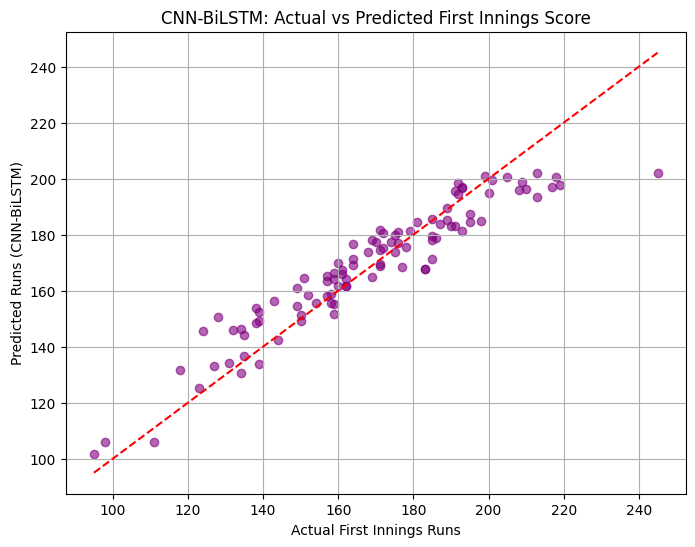

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cnn_bilstm, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (CNN-BiLSTM)")
plt.title("CNN-BiLSTM: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()

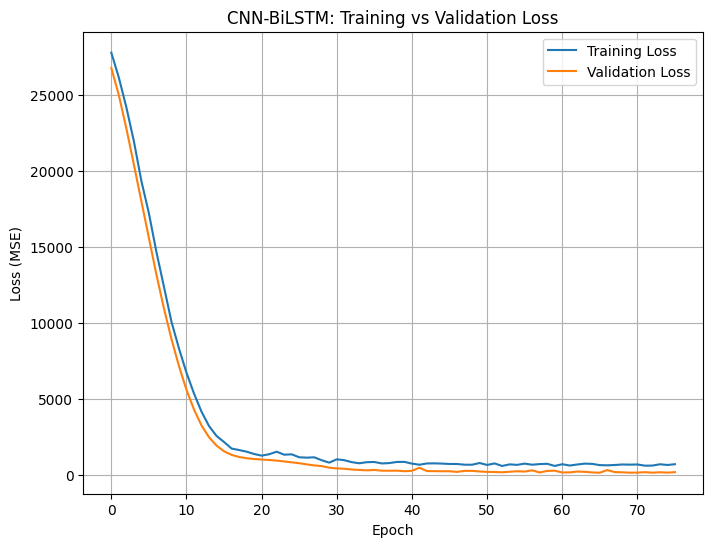

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(history_cnn_bilstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("CNN-BiLSTM: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout
from tensorflow.keras.models import Model

# Reshape data to (samples, timesteps, features)
X_train_tf = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)
X_test_tf = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)


In [55]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [56]:
def build_transformer_model(input_shape, embed_dim=32, num_heads=2, ff_dim=64, dropout_rate=0.1):
    inputs = Input(shape=input_shape)

    # Project input to embedding dimension
    x = Dense(embed_dim)(inputs)

    # Transformer block
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
    x = transformer_block(x)

    # Global average pooling
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    # Output layer
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [57]:
# Build the model
transformer_model = build_transformer_model(input_shape=(len(numerical_features), 1))

# Compile
transformer_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_tf = transformer_model.fit(
    X_train_tf, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


TypeError: missing a required argument: 'training'

In [59]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):  # FIX: set default for 'training'
        attn_output = self.att(inputs, inputs, training=training)  # pass training
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1, training=training)  # pass training
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [60]:
transformer_model = build_transformer_model(input_shape=(len(numerical_features), 1))
transformer_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history_tf = transformer_model.fit(
    X_train_tf, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 27498.5566 - mae: 162.8309 - val_loss: 26620.1660 - val_mae: 160.0404
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 25922.4941 - mae: 158.1096 - val_loss: 25612.5508 - val_mae: 156.8604
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 25314.5820 - mae: 156.0574 - val_loss: 24792.0273 - val_mae: 154.2168
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 25144.6855 - mae: 155.7043 - val_loss: 23888.2910 - val_mae: 151.2570
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23596.7012 - mae: 150.9803 - val_loss: 22829.8691 - val_mae: 147.7162
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23389.8105 - mae: 149.8637 - val_loss: 21582.9297 - val_mae: 143.4330
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 22043.3535 - mae: 145.5559 - val_loss: 20135.2539 - val_mae: 138.2947
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 20087.0566 - mae: 138.5739 - v

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_tf = transformer_model.predict(X_test_tf).flatten()

# Evaluation metrics
mae_tf = mean_absolute_error(y_test, y_pred_tf)
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

# Print results
print(f"Transformer MAE: {mae_tf:.2f}")
print(f"Transformer MSE: {mse_tf:.2f}")
print(f"Transformer RMSE: {rmse_tf:.2f}")
print(f"Transformer R² Score: {r2_tf:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Transformer MAE: 2.76
Transformer MSE: 21.84
Transformer RMSE: 4.67
Transformer R² Score: 0.97


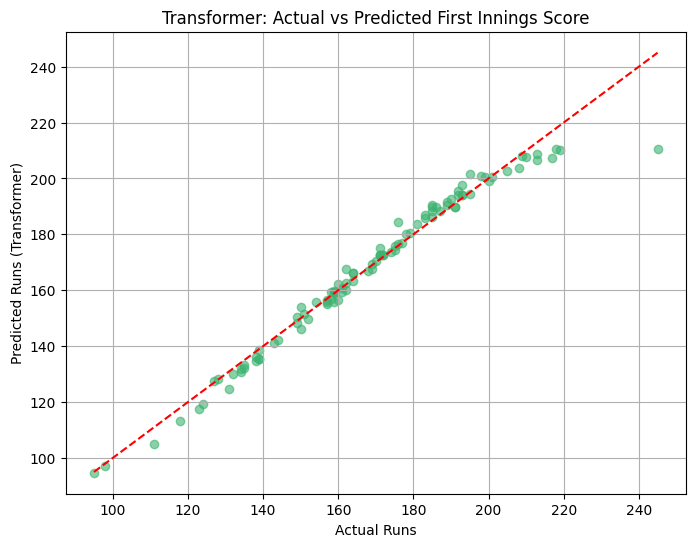

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tf, alpha=0.6, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs (Transformer)")
plt.title("Transformer: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()


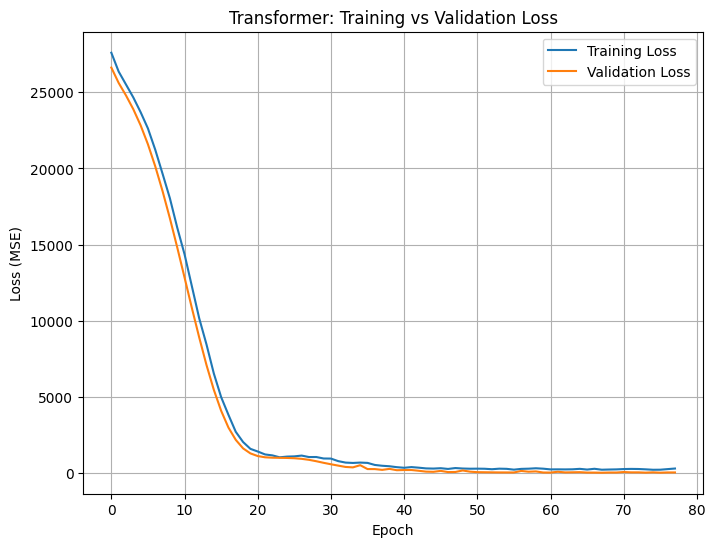

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Transformer: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [64]:
!pip install keras-tcn --quiet


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_tcn = X_train_scaled.reshape(-1, len(numerical_features), 1)
X_test_tcn = X_test_scaled.reshape(-1, len(numerical_features), 1)


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tcn import TCN

tcn_model = Sequential([
    TCN(input_shape=(len(numerical_features), 1),
        nb_filters=128,
        kernel_size=3,
        dilations=[1, 2, 4, 8, 16, 32],
        use_skip_connections=True,
        dropout_rate=0.3,
        return_sequences=False),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Regression output
])


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


In [111]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

tcn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-5, verbose=1)


In [112]:
history_tcn = tcn_model.fit(
    X_train_tcn, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 341ms/step - loss: 28675.5820 - mae: 166.8196 - val_loss: 27171.4746 - val_mae: 161.6982 - learning_rate: 0.0010
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 28123.2832 - mae: 165.1801 - val_loss: 26176.5098 - val_mae: 158.6295 - learning_rate: 0.0010
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 26907.2227 - mae: 161.1758 - val_loss: 24331.7324 - val_mae: 152.8473 - learning_rate: 0.0010
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 26219.7598 - mae: 159.1226 - val_loss: 21452.5801 - val_mae: 143.5654 - learning_rate: 0.0010
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 25706.3926 - mae: 157.4960 - val_loss: 17496.5898 - val_mae: 130.2189 - learning_rate: 0.0010
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 23363.6641 - mae: 149.3798 - val_loss: 13501.3203 - val_mae: 110.8845 - learning_rate: 0.0010
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 19231.80

In [113]:
y_pred_tcn = tcn_model.predict(X_test_tcn).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_tcn)
mse = mean_squared_error(y_test, y_pred_tcn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tcn)

print(f"TCN MAE: {mae:.2f}")
print(f"TCN MSE: {mse:.2f}")
print(f"TCN RMSE: {rmse:.2f}")
print(f"TCN R² Score: {r2:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
TCN MAE: 32.21
TCN MSE: 2654.68
TCN RMSE: 51.52
TCN R² Score: -2.44


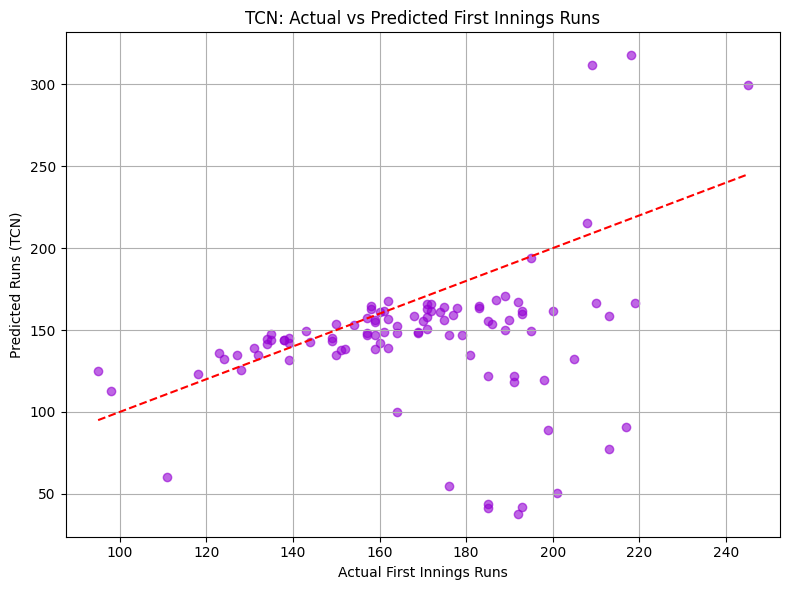

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tcn, alpha=0.6, color='darkviolet')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual First Innings Runs")
plt.ylabel("Predicted Runs (TCN)")
plt.title("TCN: Actual vs Predicted First Innings Runs")
plt.grid(True)
plt.tight_layout()
plt.show()


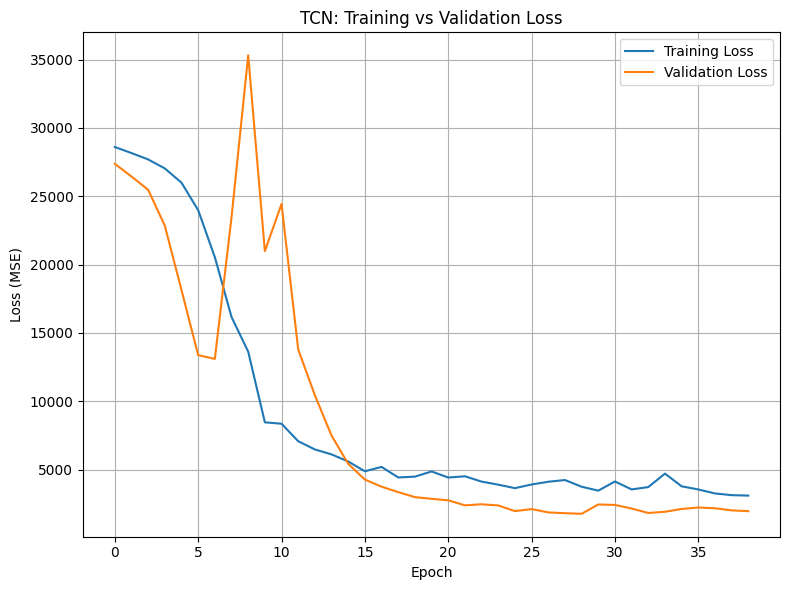

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(history_tcn.history['loss'], label='Training Loss')
plt.plot(history_tcn.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("TCN: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# Reshape input data for Transformer (samples, timesteps, features)
X_test_transformer = X_test[numerical_features].values.reshape(-1, len(numerical_features), 1)


In [73]:
X_train_transformer = X_train[numerical_features].values.reshape(-1, len(numerical_features), 1)


In [74]:
y_pred_transformer = transformer_model.predict(X_test_transformer).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [75]:
# Predictions (assume all are already trained and inputs are preprocessed)
y_pred_bilstm = bilstm_model.predict(X_test_bilstm).flatten()
y_pred_gru = gru_model.predict(X_test_gru).flatten()
y_pred_transformer = transformer_model.predict(X_test_transformer).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [76]:
# Simple average ensemble
y_pred_ensemble = (y_pred_bilstm + y_pred_gru + y_pred_transformer) / 3


In [77]:
# Weighted ensemble (tune weights based on validation performance)
y_pred_ensemble = (0.4 * y_pred_bilstm) + (0.3 * y_pred_gru) + (0.3 * y_pred_transformer)


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble MAE: {mae_ensemble:.2f}")
print(f"Ensemble MSE: {mse_ensemble:.2f}")
print(f"Ensemble RMSE: {rmse_ensemble:.2f}")
print(f"Ensemble R² Score: {r2_ensemble:.2f}")


Ensemble MAE: 2.50
Ensemble MSE: 26.87
Ensemble RMSE: 5.18
Ensemble R² Score: 0.97


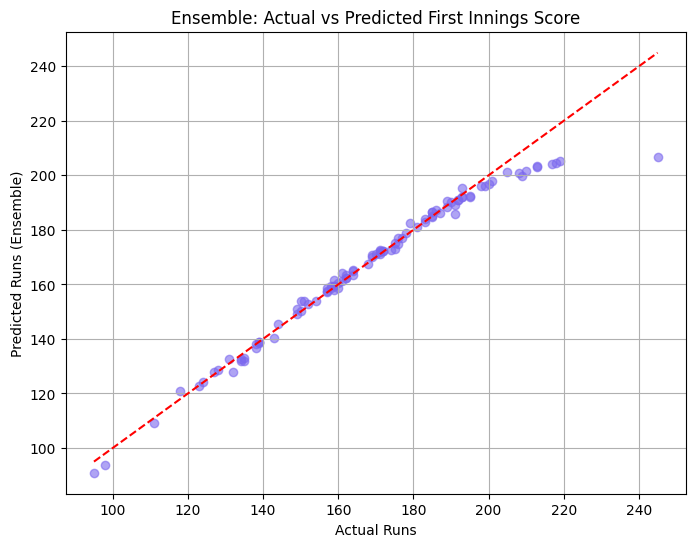

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.6, color='mediumslateblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs (Ensemble)")
plt.title("Ensemble: Actual vs Predicted First Innings Score")
plt.grid(True)
plt.show()


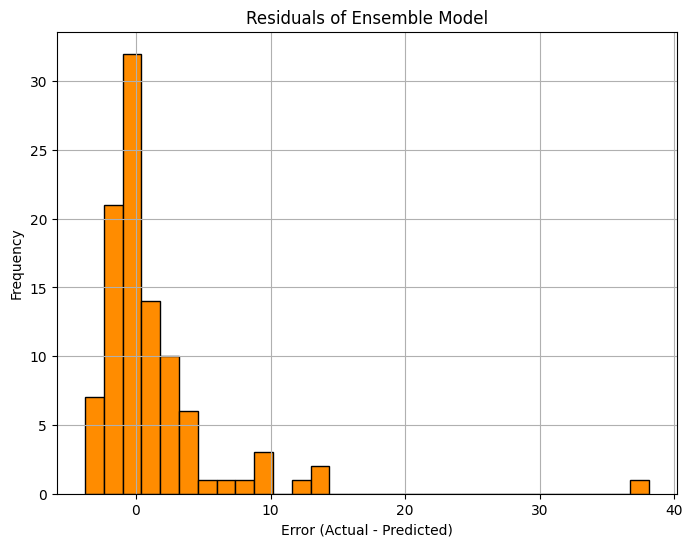

In [80]:
residuals = y_test - y_pred_ensemble

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='darkorange', edgecolor='black')
plt.title("Residuals of Ensemble Model")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [81]:
# Assuming 'model' is your trained DNN model
y_pred_dnn = model.predict(X_test_processed)  # Assuming X_test_processed is your preprocessed test data


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define metrics for each model

# DNN metrics
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

# CNN metrics
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# RNN metrics
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# LSTM metrics
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# BiLSTM metrics
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)

# GRU metrics
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

# CNN-BiLSTM metrics
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm = np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

# Transformer metrics
mae_transformer = mean_absolute_error(y_test, y_pred_transformer)
mse_transformer = mean_squared_error(y_test, y_pred_transformer)
rmse_transformer = np.sqrt(mse_transformer)
r2_transformer = r2_score(y_test, y_pred_transformer)

# TCN metrics
mae_tcn = mean_absolute_error(y_test, y_pred_tcn)
mse_tcn = mean_squared_error(y_test, y_pred_tcn)
rmse_tcn = np.sqrt(mse_tcn)
r2_tcn = r2_score(y_test, y_pred_tcn)

# Ensemble metrics
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)


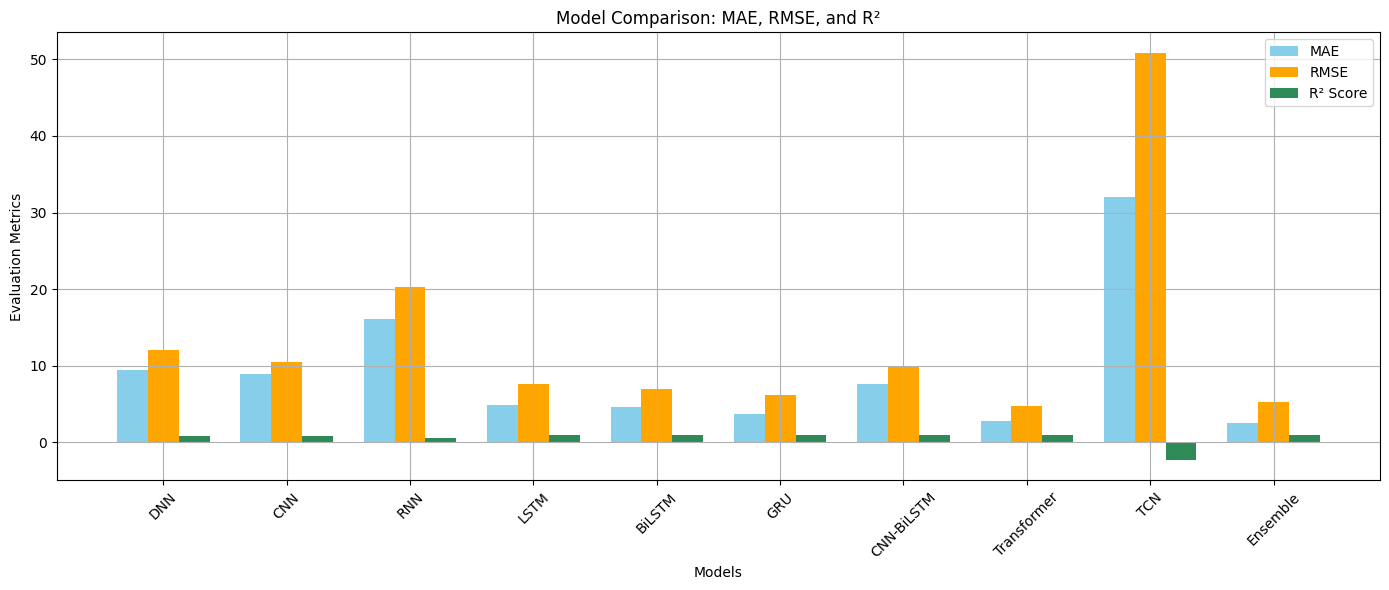

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["DNN", "CNN", "RNN", "LSTM", "BiLSTM", "GRU", "CNN-BiLSTM", "Transformer", "TCN", "Ensemble"]

# Fill with actual values you computed
mae_vals = [mae_dnn, mae_cnn, mae_rnn, mae_lstm, mae_bilstm, mae_gru, mae_cnn_bilstm, mae_transformer, mae_tcn, mae_ensemble]
rmse_vals = [rmse_dnn, rmse_cnn, rmse_rnn, rmse_lstm, rmse_bilstm, rmse_gru, rmse_cnn_bilstm, rmse_transformer, rmse_tcn, rmse_ensemble]
r2_vals = [r2_dnn, r2_cnn, r2_rnn, r2_lstm, r2_bilstm, r2_gru, r2_cnn_bilstm, r2_transformer, r2_tcn, r2_ensemble]

# Bar chart configuration
x = np.arange(len(models))  # label locations
width = 0.25  # bar width

# Plotting the results
plt.figure(figsize=(14, 6))

# Create bars for MAE, RMSE, and R² Score
plt.bar(x - width, mae_vals, width=width, label='MAE', color='skyblue')
plt.bar(x, rmse_vals, width=width, label='RMSE', color='orange')
plt.bar(x + width, r2_vals, width=width, label='R² Score', color='seagreen')

# Labels and title
plt.xlabel("Models")
plt.ylabel("Evaluation Metrics")
plt.title("Model Comparison: MAE, RMSE, and R²")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


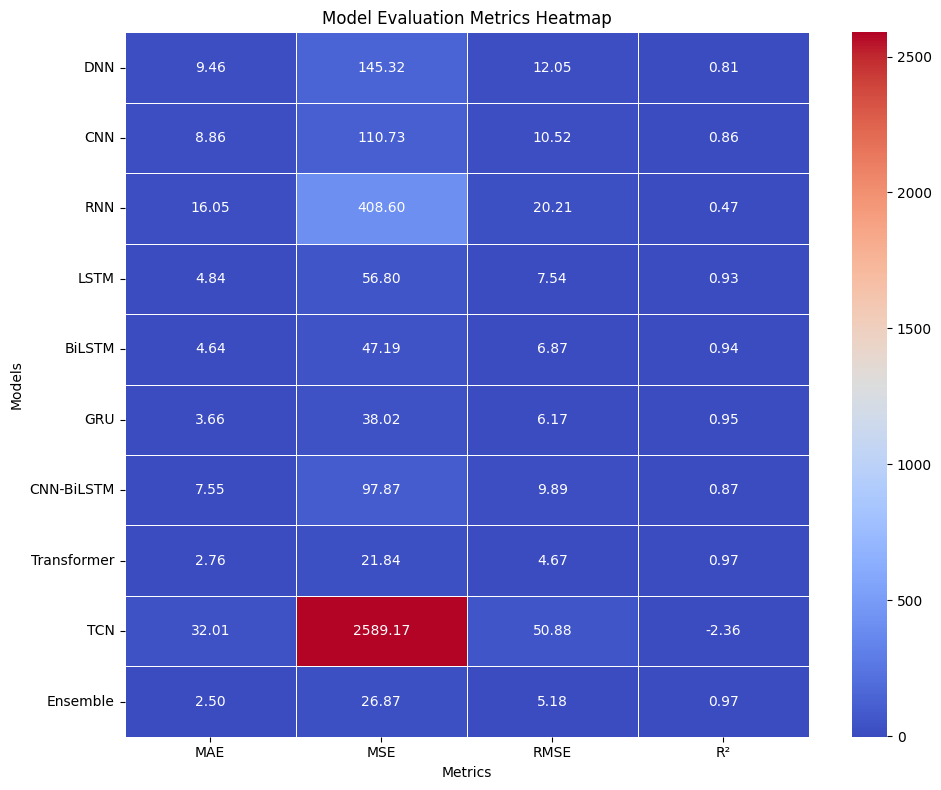

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the evaluation metrics for each model
metrics = {
    "DNN": [mae_dnn, mse_dnn, rmse_dnn, r2_dnn],
    "CNN": [mae_cnn, mse_cnn, rmse_cnn, r2_cnn],
    "RNN": [mae_rnn, mse_rnn, rmse_rnn, r2_rnn],
    "LSTM": [mae_lstm, mse_lstm, rmse_lstm, r2_lstm],
    "BiLSTM": [mae_bilstm, mse_bilstm, rmse_bilstm, r2_bilstm],
    "GRU": [mae_gru, mse_gru, rmse_gru, r2_gru],
    "CNN-BiLSTM": [mae_cnn_bilstm, mse_cnn_bilstm, rmse_cnn_bilstm, r2_cnn_bilstm],
    "Transformer": [mae_transformer, mse_transformer, rmse_transformer, r2_transformer],
    "TCN": [mae_tcn, mse_tcn, rmse_tcn, r2_tcn],
    "Ensemble": [mae_ensemble, mse_ensemble, rmse_ensemble, r2_ensemble]
}

# Step 2: Convert metrics dictionary into a pandas DataFrame
metric_names = ['MAE', 'MSE', 'RMSE', 'R²']
model_names = list(metrics.keys())
metric_values = [metrics[model] for model in model_names]

df = pd.DataFrame(metric_values, columns=metric_names, index=model_names)

# Step 3: Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Model Evaluation Metrics Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()


In [85]:
import numpy as np
import pandas as pd

# --- 1. Example Input ---
# Over-wise runs (modify these as needed, 0–19 overs)
input_overwise = {
    f'Over_{i}': val for i, val in enumerate([4, 6, 8, 10, 7, 9, 6, 5, 8, 12, 6, 10, 7, 4, 8, 5, 9, 6, 7, 5])
}

# Match metadata (must match training data values exactly!)
input_meta = {
    'City': 'Mumbai',
    'Venue': 'Wankhede Stadium',
    'Team1': 'Mumbai Indians',
    'Team2': 'Chennai Super Kings',
    'TossWinner': 'Mumbai Indians',
    'TossDecision': 'Bat'
}

# Combine into single input dictionary
input_dict = {**input_overwise, **input_meta}

# Convert to DataFrame
input_df = pd.DataFrame([input_dict])

# --- 2. Apply the preprocessor used in training ---
input_transformed = preprocessor.transform(input_df)

# --- 3. Predict using the trained model ---
predicted_score = model.predict(input_transformed).flatten()[0]
print(f"🔮 Predicted First Innings Score: {predicted_score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
🔮 Predicted First Innings Score: 93.90


In [86]:
import numpy as np
import pandas as pd

# --- 1. Input: Over-wise runs (Over_0 to Over_19) ---
input_overwise = [4, 6, 8, 10, 7, 9, 6, 5, 8, 12, 6, 10, 7, 4, 8, 5, 9, 6, 7, 5]

# --- 2. Dummy metadata (categorical columns) — adjust values as needed ---
input_meta = {
    'City': 'Mumbai',
    'Venue': 'Wankhede Stadium',
    'Team1': 'Mumbai Indians',
    'Team2': 'Chennai Super Kings',
    'TossWinner': 'Mumbai Indians',
    'TossDecision': 'Bat'
}

# --- 3. Combine over-wise and metadata into one input dictionary ---
input_dict = {col: val for col, val in zip(numerical_features, input_overwise)}
input_dict.update(input_meta)

# --- 4. Convert to DataFrame with exact training column order ---
input_df = pd.DataFrame([input_dict])

# --- 5. Apply preprocessing (same ColumnTransformer used in training) ---
input_scaled = preprocessor.transform(input_df).toarray()  # Ensure dense array

# --- 6. Extract numerical features (first 20 columns are over-wise scores) ---
input_numerical_scaled = input_scaled[:, :len(numerical_features)]

# --- 7. Reshape input for Transformer model: (samples, timesteps, features) ---
input_reshaped = input_numerical_scaled.reshape(-1, len(numerical_features), 1)

# --- 8. Predict the score ---
predicted_score = transformer_model.predict(input_reshaped).flatten()[0]
print(f"🧠 Predicted First Innings Score (Transformer): {predicted_score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
🧠 Predicted First Innings Score (Transformer): 26.62


In [87]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [88]:
import gradio as gr


In [89]:
import joblib

# Assuming your pipeline is named 'preprocessor'
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']

In [90]:
%whos


Variable                  Type                 Data/Info
--------------------------------------------------------
BatchNormalization        type                 <class 'keras.src.layers.<...>tion.BatchNormalization'>
Bidirectional             type                 <class 'keras.src.layers.<...>rectional.Bidirectional'>
ColumnTransformer         ABCMeta              <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
Conv1D                    type                 <class 'keras.src.layers.<...>olutional.conv1d.Conv1D'>
Dense                     type                 <class 'keras.src.layers.core.dense.Dense'>
Dropout                   type                 <class 'keras.src.layers.<...>ization.dropout.Dropout'>
EarlyStopping             type                 <class 'keras.src.callbac<...>_stopping.EarlyStopping'>
Flatten                   type                 <class 'keras.src.layers.<...>shaping.flatten.Flatten'>
GRU                       type                 <class 'keras.src.layers.rn

In [92]:
pip install gradio


In [93]:
import gradio as gr

# Prediction function for ensemble model
def predict_ensemble(input_features):
    # Preprocess the input as per your trained model
    # Assuming input_features is a list of numerical values for prediction
    input_array = np.array(input_features).reshape(1, -1)  # Adjust according to your feature shape
    input_scaled = scaler.transform(input_array)  # Scaling if needed

    # Make predictions using the ensemble model
    prediction = (0.4 * y_pred_bilstm) + (0.3 * y_pred_gru) + (0.3 * y_pred_transformer)

    return prediction[0]  # Return a single prediction


In [94]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'ensemble_model' is your trained model
scaler = StandardScaler()  # For scaling input features if required


In [95]:
def predict_first_innings_score(batting_team, bowling_team, batsman_name, bowler_name, venue, city, year, overs_completed, wickets_fallen, fours, sixes):
    # Preprocess the inputs (convert categorical features to numerical, apply scaling, etc.)

    # Example of how to convert categorical data to numerical (one-hot encoding, etc.)
    features = {
        'batting_team': batting_team,
        'bowling_team': bowling_team,
        'batsman_name': batsman_name,
        'bowler_name': bowler_name,
        'venue': venue,
        'city': city,
        'year': year,
        'overs_completed': overs_completed,
        'wickets_fallen': wickets_fallen,
        'fours': fours,
        'sixes': sixes
    }

    # Convert categorical features to numeric values (you need to implement this part)
    # For example, using one-hot encoding or label encoding for teams, players, venues, etc.

    # Sample: You would convert 'batting_team', 'bowling_team', etc. to numerical representations
    # For now, let's assume 'numerical_features' is a list of numerical values after conversion

    input_data = np.array([[features['overs_completed'], features['wickets_fallen'], features['fours'], features['sixes']]])
    input_data = scaler.transform(input_data)  # If you've scaled your data during training

    # Get the predicted score from the ensemble model
    predicted_score = ensemble_model.predict(input_data)
    return predicted_score[0]


In [96]:
def predict_first_innings_score(batting_team, bowling_team, batsman_name, bowler_name, venue, city, year, overs_completed, wickets_fallen, fours, sixes):
    # Example dictionary with user inputs
    features = {
        'batting_team': batting_team,
        'bowling_team': bowling_team,
        'batsman_name': batsman_name,
        'bowler_name': bowler_name,
        'venue': venue,
        'city': city,
        'year': year,
        'overs_completed': overs_completed,
        'wickets_fallen': wickets_fallen,
        'fours': fours,
        'sixes': sixes
    }

    # Convert categorical features to numeric values (label encoding or one-hot encoding)
    # For example, let's assume that 'batting_team' and 'bowling_team' are encoded using some dictionary
    # You can modify this part depending on how your teams/players/venues are encoded
    # For simplicity, we'll assign random integers or use pre-defined mappings.

    team_mapping = {'Team A': 0, 'Team B': 1, 'Team C': 2}  # Example mapping
    player_mapping = {'Player A': 0, 'Player B': 1}  # Example mapping

    features['batting_team'] = team_mapping.get(features['batting_team'], -1)  # -1 for unknown teams
    features['bowling_team'] = team_mapping.get(features['bowling_team'], -1)
    features['batsman_name'] = player_mapping.get(features['batsman_name'], -1)
    features['bowler_name'] = player_mapping.get(features['bowler_name'], -1)

    # Numeric features: overs, wickets, fours, sixes
    input_data = np.array([[features['overs_completed'], features['wickets_fallen'], features['fours'], features['sixes']]])

    # Scaling the input data (if you scaled your data during training)
    input_data = scaler.transform(input_data)

    # Predict using the ensemble model
    predicted_score = ensemble_model.predict(input_data)

    return predicted_score[0]


In [97]:
import gradio as gr
import numpy as np

# Define the prediction function (assuming your model and scaler are already defined)
def predict_first_innings_score(batting_team, bowling_team, batsman_name, bowler_name, venue, city, year, overs_completed, wickets_fallen, fours, sixes):
    # Example dictionary with user inputs
    features = {
        'batting_team': batting_team,
        'bowling_team': bowling_team,
        'batsman_name': batsman_name,
        'bowler_name': bowler_name,
        'venue': venue,
        'city': city,
        'year': year,
        'overs_completed': overs_completed,
        'wickets_fallen': wickets_fallen,
        'fours': fours,
        'sixes': sixes
    }

    # Convert categorical features to numeric values (label encoding or one-hot encoding)
    # For example, let's assume that 'batting_team' and 'bowling_team' are encoded using some dictionary
    team_mapping = {'Team A': 0, 'Team B': 1, 'Team C': 2}  # Example mapping
    player_mapping = {'Player A': 0, 'Player B': 1}  # Example mapping

    features['batting_team'] = team_mapping.get(features['batting_team'], -1)  # -1 for unknown teams
    features['bowling_team'] = team_mapping.get(features['bowling_team'], -1)
    features['batsman_name'] = player_mapping.get(features['batsman_name'], -1)
    features['bowler_name'] = player_mapping.get(features['bowler_name'], -1)

    # Numeric features: overs, wickets, fours, sixes
    input_data = np.array([[features['overs_completed'], features['wickets_fallen'], features['fours'], features['sixes']]])

    # Scaling the input data (if you scaled your data during training)
    input_data = scaler.transform(input_data)

    # Predict using the ensemble model
    predicted_score = ensemble_model.predict(input_data)

    return predicted_score[0]

# Define the input interface for Gradio
inputs = [
    gr.Dropdown(choices=["Team A", "Team B", "Team C"], label="Batting Team"),
    gr.Dropdown(choices=["Team A", "Team B", "Team C"], label="Bowling Team"),
    gr.Textbox(label="Batsman Name"),
    gr.Textbox(label="Bowler Name"),
    gr.Textbox(label="Venue"),
    gr.Textbox(label="City"),
    gr.Slider(minimum=2000, maximum=2025, value=2023, label="Year"),  # Use 'value' instead of 'default'
    gr.Slider(minimum=0, maximum=50, value=10, label="Overs Completed"),  # Use 'value' instead of 'default'
    gr.Slider(minimum=0, maximum=10, value=3, label="Wickets Fallen"),  # Use 'value' instead of 'default'
    gr.Slider(minimum=0, maximum=20, value=5, label="Number of Fours"),  # Use 'value' instead of 'default'
    gr.Slider(minimum=0, maximum=10, value=2, label="Number of Sixes")  # Use 'value' instead of 'default'
]

outputs = gr.Textbox(label="Predicted First Innings Score")

# Launch the Gradio interface
gr.Interface(fn=predict_first_innings_score, inputs=inputs, outputs=outputs, live=True).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8041e82ea9f9b29872.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [124]:
import gradio as gr
import tensorflow as tf
import numpy as np
import joblib
import os  # Import os for file path operations
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# Custom Transformer Block (needed to load transformer model)
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):  # Add **kwargs to accept extra arguments
        super(TransformerBlock, self).__init__(**kwargs)  # Pass kwargs to the super class
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),
            tf.keras.layers.Dense(embed_dim)
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


# Define the file paths for the encoders and scaler
encoder_filepath = "batting_team_encoder.save"
bowling_encoder_filepath = "bowling_team_encoder.save"
venue_encoder_filepath = "venue_encoder.save"
city_encoder_filepath = "city_encoder.save"
scaler_filepath = "scaler.save"

# Load models (ensure these paths are correct)
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
gru_model = tf.keras.models.load_model("gru_model.h5")
transformer_model = tf.keras.models.load_model("transformer_model.h5", custom_objects={'TransformerBlock': TransformerBlock})


# Load encoders and scaler if they exist, otherwise create new ones
if os.path.exists(encoder_filepath):
    batting_encoder = joblib.load(encoder_filepath)
else:
    batting_encoder = LabelEncoder()

if os.path.exists(bowling_encoder_filepath):
    bowling_encoder = joblib.load(bowling_encoder_filepath)
else:
    bowling_encoder = LabelEncoder()

if os.path.exists(venue_encoder_filepath):
    venue_encoder = joblib.load(venue_encoder_filepath)
else:
    venue_encoder = LabelEncoder()

if os.path.exists(city_encoder_filepath):
    city_encoder = joblib.load(city_encoder_filepath)
else:
    city_encoder = LabelEncoder()

if os.path.exists(scaler_filepath):
    scaler = joblib.load(scaler_filepath)
else:
    scaler = StandardScaler()


# Inference function
def predict_ensemble(team1, team2, venue, city, runs, fours, sixes, overs, wickets):
    # Encode categorical features
    team1_encoded = batting_encoder.transform([team1])[0]
    team2_encoded = bowling_encoder.transform([team2])[0]
    venue_encoded = venue_encoder.transform([venue])[0]
    city_encoded = city_encoder.transform([city])[0]

    # Prepare feature vector
    features = np.array([[team1_encoded, team2_encoded, venue_encoded, city_encoded, runs, fours, sixes, overs, wickets]])

    # Scaling if scaler was loaded
    if isinstance(scaler, StandardScaler):
        scaled = scaler.transform(features)
    else:
        scaled = features  # No scaling if scaler wasn't loaded

    reshaped = scaled.reshape(scaled.shape[0], scaled.shape[1], 1)

    # Individual predictions
    pred_bilstm = bilstm_model.predict(reshaped)[0][0]
    pred_gru = gru_model.predict(reshaped)[0][0]
    pred_transformer = transformer_model.predict(reshaped)[0][0]

    # Weighted ensemble prediction
    ensemble_pred = (0.4 * pred_bilstm) + (0.3 * pred_gru) + (0.3 * pred_transformer)

    return round(ensemble_pred, 2)


# Gradio interface
input_components = [
    gr.Textbox(label="Batting Team"),
    gr.Textbox(label="Bowling Team"),
    gr.Textbox(label="Venue"),
    gr.Textbox(label="City"),
    gr.Number(label="Runs Scored"),
    gr.Number(label="Fours"),
    gr.Number(label="Sixes"),
    gr.Number(label="Overs Played"),
    gr.Number(label="Wickets Fallen")
]

output_component = gr.Textbox(label="Predicted First Innings Score")

gr.Interface(fn=predict_ensemble,
             inputs=input_components,
             outputs=output_component,
             title="T20 First Innings Score Predictor (Ensemble Model)").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d67ba1eb36651e3bd3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
